Predicting the wine quality using simple features and bag of words approach

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("winemag-data-130k-v2.csv",index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
len(df)

129971

In [4]:
print(df.columns)

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')


In [5]:
df['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

taking only US country

In [6]:
df=df[df['country']=='US']

# EDA

In [7]:
df=df.drop_duplicates().reset_index(drop=True)
len(df)

50457

In [109]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
4,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [110]:
# Describing all the continuous Features
df.describe()

,points,price
count,50457.000000,50238.000000
mean,88.555384,36.697520
std,3.167774,27.524319
min,80.000000,4.000000
25%,86.000000,20.000000
50%,88.000000,30.000000
75%,91.000000,45.000000
max,100.000000,2013.000000


In [111]:
# Describing all the Categorical Features
cat=df.select_dtypes(include=['object'])
cat.describe(include=['O'])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,50457,50457,34170,50457,50202,46769,34466,31749,50457,50457,50457
unique,1,50449,14183,27,264,17,15,12,50229,257,5375
top,US,"Hugely delicious, just a joy to drink. So soft...",Reserve,California,Napa Valley,Central Coast,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Williams Selyem
freq,50457,2,1388,33656,4174,10233,8708,8708,9,9165,204


In [112]:
missing=pd.isna(df).sum()/len(df)*100
missing

country                   0.000000
description               0.000000
designation              32.278970
points                    0.000000
price                     0.434033
province                  0.000000
region_1                  0.505381
region_2                  7.309194
taster_name              31.692332
taster_twitter_handle    37.077115
title                     0.000000
variety                   0.000000
winery                    0.000000
dtype: float64

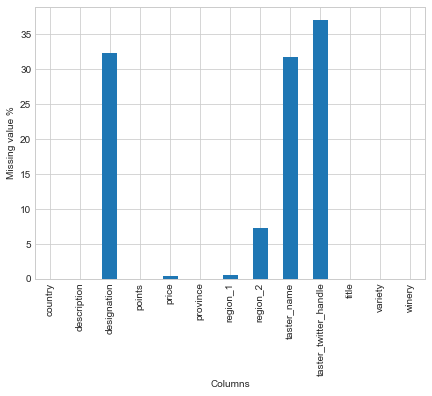

In [113]:
plt.rcParams["figure.figsize"] = (7,5)
plt.xlabel('Columns')
plt.ylabel('Missing value %')
missing.plot(kind='bar');

In [114]:
#plotting few columns
a=df.drop(['country','title','description','designation','region_1','variety','winery'],1)
a.columns

Index(['points', 'price', 'province', 'region_2', 'taster_name',
       'taster_twitter_handle'],
      dtype='object')

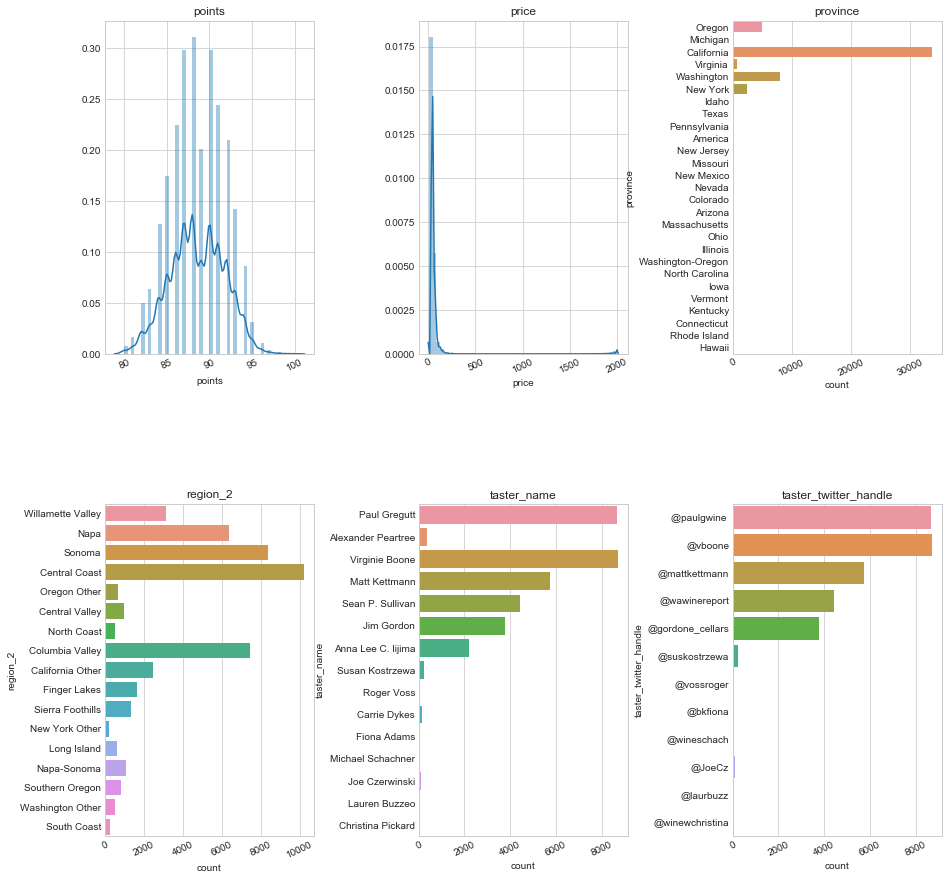

In [115]:
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
def plot_distribution(dataset, cols=5, width=20, height=25, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(a, cols=3, width=15, height=15, hspace=0.45, wspace=0.5)

# TASK 1

Data preparation

filling categorical column with missing values using Unknown

filling continuous value with median value after observing the univariate distribution of that variable

In [8]:
df['designation'].fillna('unknown', inplace = True)
df['region_1'].fillna('unknown', inplace = True)
df['region_2'].fillna('unknown', inplace = True)
df['taster_name'].fillna('unknown', inplace = True)
df['taster_twitter_handle'].fillna('unknown', inplace = True)
df['price'].fillna((df['price'].median()), inplace = True)
pd.isna(df).sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [9]:
print(df.columns)

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')


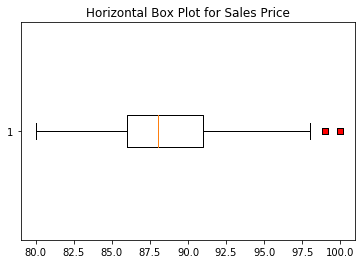

In [10]:
red_square = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots()
ax.set_title('Horizontal Box Plot for Sales Price')
ax.boxplot(df.points, vert=False, flierprops=red_square)
plt.show()

Checking Outliers for target variable

In [11]:
Q1 = df['points'].quantile(0.25)
Q3 = df['points'].quantile(0.75)
IQR = Q3 - Q1
#checking for extreme outliers outside 3 IQR range as these can be safely removed
outlierdf=(df[((df['points']< (Q1 - 3* IQR)) |(df['points'] > (Q3 + 3 * IQR)))])
outlierdf

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


Checking Outliers for Price variable

In [12]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
#checking for extreme outliers outside 3 IQR range as these can be safely removed
outlierdf=(df[((df['price']< (Q1 - 3* IQR)) |(df['price'] > (Q3 + 3 * IQR)))])
outlierdf['price'].unique()

array([ 125.,  200.,  160.,  130.,  150.,  175.,  300.,  145.,  260.,
        195.,  155.,  210.,  230.,  135.,  190.,  140.,  165.,  250.,
        235.,  225.,  138.,  500.,  240.,  180.,  625.,  265.,  185.,
        275.,  179.,  325.,  215.,  450.,  750.,  170.,  129.,  219.,
        245.,  126.,  350.,  199.,  400.,  147.,  136.,  220., 2013.,
        290.,  335.,  149.,  168.])

In [13]:
df=df[~((df['price']< (Q1 - 3* IQR)) |(df['price'] > (Q3 + 3 * IQR)))]
len(df)

49687

# 1.1

In [14]:
#Non text features
df_nontxt=df[['country', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 
       'variety', 'winery']]
df_nontxt.head()

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
0,US,unknown,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm
1,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,unknown,Alexander Peartree,unknown,Riesling,St. Julian
2,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks
3,US,Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Cabernet Sauvignon,Kirkland Signature
4,US,unknown,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Cabernet Sauvignon,Louis M. Martini


In [28]:
df_nontxt.columns


Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'variety',
       'winery'],
      dtype='object')

In [29]:
quantile = list(df_nontxt.points.quantile([0, 0.25, 0.5, 0.75, 1.0]))
y_binned = []
for i in df_nontxt['points']:
    if i<=quantile[1]:y_binned.append(1)
    elif i<=quantile[2]:y_binned.append(2)
    elif i<=quantile[3]:y_binned.append(3)
    else: y_binned.append(4)

removing country as it is same for all

removing designation as it has a lot of unique values

In [30]:
from sklearn.model_selection import train_test_split
X = df_nontxt.drop(['points','country','designation'],axis=1)
y=df_nontxt['points']

In [31]:
cat=X.select_dtypes(include=['object'])
cat.columns #list of categorical features

Index(['province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'variety', 'winery'],
      dtype='object')

In [32]:
cnt=list(X.columns[X.dtypes !=object])
cnt

['price']

In [33]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y_binned)

In [34]:
from category_encoders import TargetEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
preprocess = make_column_transformer((TargetEncoder(),['region_1','variety','winery']),(StandardScaler(), cnt),(OneHotEncoder(handle_unknown='ignore',sparse=False), ['province','region_2','taster_name','taster_twitter_handle']),remainder='passthrough')


In [35]:
r1 = make_pipeline(preprocess,linear_model.Ridge())
scores = cross_val_score(r1, X_train, y_train,cv=5)
np.mean(scores)

0.4584580876174062

without standard scaling

In [36]:
preprocess1 = make_column_transformer((TargetEncoder(),['region_1','variety','winery']),(OneHotEncoder(handle_unknown='ignore',sparse=False), ['province','region_2','taster_name','taster_twitter_handle']),remainder='passthrough')
r1 = make_pipeline(preprocess1,linear_model.Ridge())
scores = cross_val_score(r1, X_train, y_train,cv=5)
np.mean(scores)

0.4584592167935072

In [37]:
r1.fit(X_train, y_train)
r1.score(X_test,y_test)

0.4720176409939024

# 1.2

In [38]:
df_text=df[['description','title','points']]
df_text.head()

,description,title,points
0,"Tart and snappy, the flavors of lime flesh and...",Rainstorm 2013 Pinot Gris (Willamette Valley),87
1,"Pineapple rind, lemon pith and orange blossom ...",St. Julian 2013 Reserve Late Harvest Riesling ...,87
2,"Much like the regular bottling from 2012, this...",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,87
3,"Soft, supple plum envelopes an oaky structure ...",Kirkland Signature 2011 Mountain Cuvée Caberne...,87
4,"Slightly reduced, this wine offers a chalky, t...",Louis M. Martini 2012 Cabernet Sauvignon (Alex...,87


In [39]:
quantile = list(df_text.points.quantile([0, 0.25, 0.5, 0.75, 1.0]))
y_binned = []
for i in df_text['points']:
    if i<=quantile[1]:y_binned.append(1)
    elif i<=quantile[2]:y_binned.append(2)
    elif i<=quantile[3]:y_binned.append(3)
    else: y_binned.append(4)

In [40]:
from sklearn.model_selection import train_test_split
X = df_text.drop(['points'],axis=1)
y=df_text['points']
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y_binned)

removing stop words  

In [41]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
preprocess3=make_column_transformer((count_vect,'description'),(count_vect,'title'))
r1 = make_pipeline(preprocess3,linear_model.Ridge())
scores = cross_val_score(r1, X_train, y_train,cv=5)
np.mean(scores)

0.7056146470659994

In [42]:
r1.fit(X_train, y_train)
r1.score(X_test,y_test)

0.7131304336958858

# 1.3 tuning the BoW model

In [43]:
import nltk
#function to include only alphanumeric characters and then performed stemming
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words


CountVectorizer with ngrams and tokenization

In [46]:
import re
count_vect = CountVectorizer(ngram_range=(1, 2),tokenizer=Tokenizer)

preprocess3=make_column_transformer((count_vect,'description'),(count_vect,'title'))
r1 = make_pipeline(preprocess3,linear_model.Ridge())
scores = cross_val_score(r1, X_train, y_train,cv=5)
np.mean(scores)

0.7330020957966483

TfidfVectorizer with tokenization

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = TfidfVectorizer(tokenizer=Tokenizer)

preprocess3=make_column_transformer((count_vect,'description'),(count_vect,'title'))
r1 = make_pipeline(preprocess3,linear_model.Ridge())
scores = cross_val_score(r1, X_train, y_train,cv=5)
np.mean(scores)

0.7437810738423101

TfidfVectorizer with ngrams and tokenization

In [ ]:
count_vect = TfidfVectorizer(ngram_range=(1, 2),tokenizer=Tokenizer)

preprocess3=make_column_transformer((count_vect,'description'),(count_vect,'title'))
r1 = make_pipeline(preprocess3,linear_model.Ridge())
scores = cross_val_score(r1, X_train, y_train,cv=5)
np.mean(scores)

In [49]:
r1.fit(X_train, y_train)
r1.score(X_test,y_test)

0.7445598462052587

# 1.4

In [50]:
finaldf=df.drop(['country','designation'],axis=1)

In [51]:
quantile = list(finaldf.points.quantile([0, 0.25, 0.5, 0.75, 1.0]))
y_binned = []
for i in finaldf['points']:
    if i<=quantile[1]:y_binned.append(1)
    elif i<=quantile[2]:y_binned.append(2)
    elif i<=quantile[3]:y_binned.append(3)
    else: y_binned.append(4)

In [52]:
from sklearn.model_selection import train_test_split
X = finaldf.drop(['points'],axis=1)
y=finaldf['points']
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y_binned)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [53]:
X_train.head()

,description,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,"Pale yellow-pink in color, this sparkler shows...",44.0,California,Santa Maria Valley,Central Coast,Matt Kettmann,@mattkettmann,Riverbench 2015 Cork Jumper Brut Rosé Sparklin...,Sparkling Blend,Riverbench
1,"Spicy, tangy and tart, this well-made wine is ...",25.0,California,Dry Creek Valley,Sonoma,Virginie Boone,@vboone,Quivira 2015 Zinfandel (Dry Creek Valley),Zinfandel,Quivira
2,"This wine is brooding, with aromas of dark che...",30.0,Washington,Red Mountain,Columbia Valley,Sean P. Sullivan,@wawinereport,Hedges 2013 Descendants Liégeois Dupont Les Go...,Syrah,Hedges
3,"This wine offers notes of smoke, tire rubber a...",20.0,Washington,Washington,Washington Other,Sean P. Sullivan,@wawinereport,Wilridge 2012 Rachel Red (Washington),Red Blend,Wilridge
4,You can taste the California sun in every sip ...,65.0,California,Stags Leap District,Napa,unknown,unknown,Robinson Family Vineyards 2010 Estate Cabernet...,Cabernet Franc,Robinson Family Vineyards


In [54]:
count_vect = TfidfVectorizer(tokenizer=Tokenizer)
preprocess = make_column_transformer((TargetEncoder(),['region_1','variety','winery']),(StandardScaler(), cnt),(OneHotEncoder(handle_unknown='ignore',sparse=False), ['province','region_2','taster_name','taster_twitter_handle']),(count_vect,'description'),(count_vect,'title'))

In [55]:
preprocess4=make_pipeline(preprocess,linear_model.Ridge())
scores = cross_val_score(preprocess4, X_train, y_train,cv=5)
np.mean(scores)

0.7577076465089716

In [56]:
preprocess4.fit(X_train, y_train)
preprocess4.score(X_test,y_test)

0.7600031609567203

Combining non-text features with text-features leads to a very small improvement from 0.74 to 0.76. This means that text features are sufficient enough to predict the wine quality.